In [219]:
!pip install yfinance

In [220]:
import yfinance as yf
import pandas as pd
microsoft = yf.Ticker("MSFT")

In [221]:
print(microsoft.actions)

                           Dividends  Stock Splits
Date                                              
1987-09-21 00:00:00-04:00       0.00           2.0
1990-04-16 00:00:00-04:00       0.00           2.0
1991-06-27 00:00:00-04:00       0.00           1.5
1992-06-15 00:00:00-04:00       0.00           1.5
1994-05-23 00:00:00-04:00       0.00           2.0
...                              ...           ...
2023-11-15 00:00:00-05:00       0.75           0.0
2024-02-14 00:00:00-05:00       0.75           0.0
2024-05-15 00:00:00-04:00       0.75           0.0
2024-08-15 00:00:00-04:00       0.75           0.0
2024-11-21 00:00:00-05:00       0.83           0.0

[93 rows x 2 columns]


[*********************100%***********************]  2 of 2 completed


Ticker           ADBE       MSFT
Date                            
2008-10-01  39.419998  26.379999
2008-10-02  37.880001  26.180000
2008-10-03  34.830002  26.370001
2008-10-06  31.930000  25.629999
2008-10-07  31.160000  24.980000


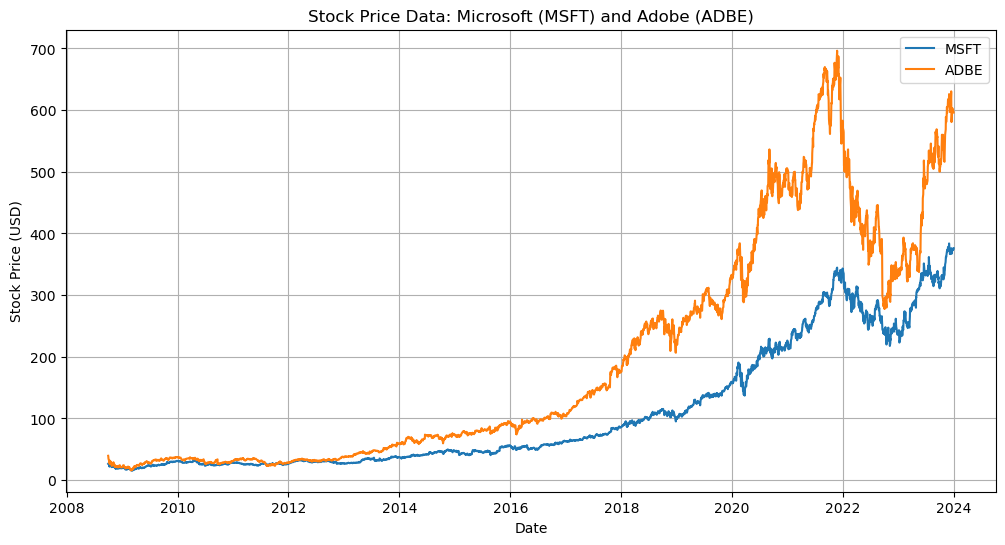

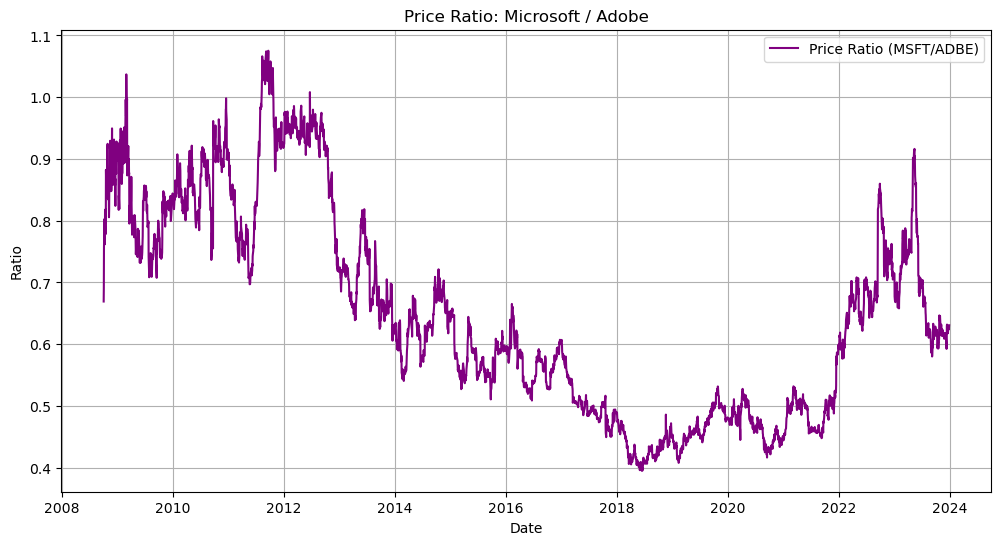

In [275]:
import matplotlib.pyplot as plt
tickers = ['MSFT', 'ADBE']

data = yf.download(tickers, start="2012-10-01", end="2023-12-31")['Open']
print(data.head())
data['Ratio'] = data['MSFT'] / data['ADBE']
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)

plt.title("Stock Price Data: Microsoft (MSFT) and Adobe (ADBE)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data['Ratio'], label='Price Ratio (MSFT/ADBE)', color='purple')
plt.title("Price Ratio: Microsoft / Adobe")
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.legend()
plt.grid(True)
plt.show()


data.to_csv("stock_prices_msft_adbe.csv")


In [277]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Ratio'].dropna())  

adf_result = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Number of Lags Used": adf_test[2],
    "Number of Observations": adf_test[3]
}
print("ADF Test Results:")
for key, value in adf_result.items():
    print(f"{key}: {value}")


ADF Test Results:
ADF Statistic: -2.075960366242483
p-value: 0.254290265678107
Number of Lags Used: 30
Number of Observations: 3807


In [224]:
!pip install pandas_datareader

In [225]:
import pandas_datareader as pdr
from datetime import datetime
def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 10, 27), end=datetime(2021, 10, 27)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["DPZ", "AAPL", "GOOG","ADBE", "MSFT"] #Name of company (Dominos pizza)
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(252, 5)


,DPZ,AAPL,GOOG,ADBE,MSFT
Date,,,,,
2021-10-20,465.170013,148.699997,144.222504,639.280029,309.209991
2021-10-21,460.649994,148.809998,142.192001,632.000000,307.170013
2021-10-22,467.809998,149.690002,140.350998,640.429993,310.399994
2021-10-25,464.250000,148.679993,138.810501,644.469971,309.359985
2021-10-26,467.519989,149.330002,140.606003,650.909973,311.000000


<Axes: >

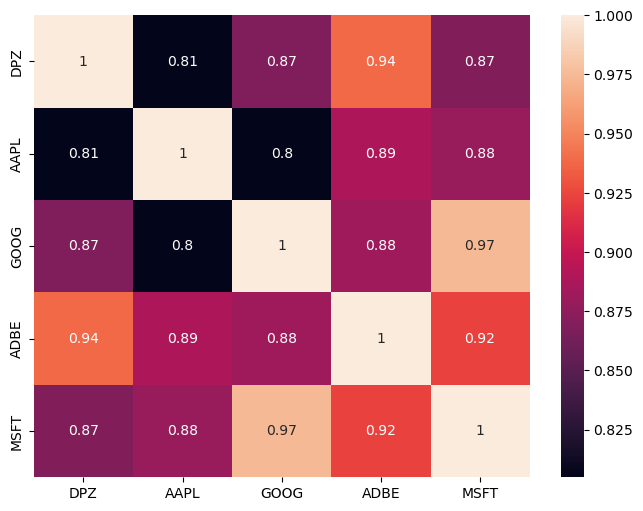

In [226]:
import seaborn as sn
corr_matrix = d.corr()
corr_matrix
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
sn.heatmap(corr_matrix, annot = True)

Ticker            ADBE       MSFT     Ratio     MAVG5    MAVG20    MAVG60  \
Date                                                                        
2016-12-23  104.610001  63.450001  0.606539  0.604289  0.592397  0.564561   
2016-12-27  105.000000  63.209999  0.602000  0.603882  0.593711  0.565722   
2016-12-28  104.830002  63.400002  0.604789  0.604100  0.594868  0.566976   
2016-12-29  103.629997  62.860001  0.606581  0.605443  0.596213  0.568290   
2016-12-30  104.070000  62.959999  0.604977  0.604977  0.597231  0.569579   

Ticker         STD20     STD60  ZScore20_5  ZScore60_5  RateOfChange  
Date                                                                  
2016-12-23  0.008792  0.025208    1.352652    1.576012     -0.126352  
2016-12-27  0.008104  0.025302    1.255021    1.508144     -0.748276  
2016-12-28  0.007942  0.025344    1.162435    1.464815      0.463242  
2016-12-29  0.007500  0.025319    1.230674    1.467393      0.296371  
2016-12-30  0.007219  0.025184    

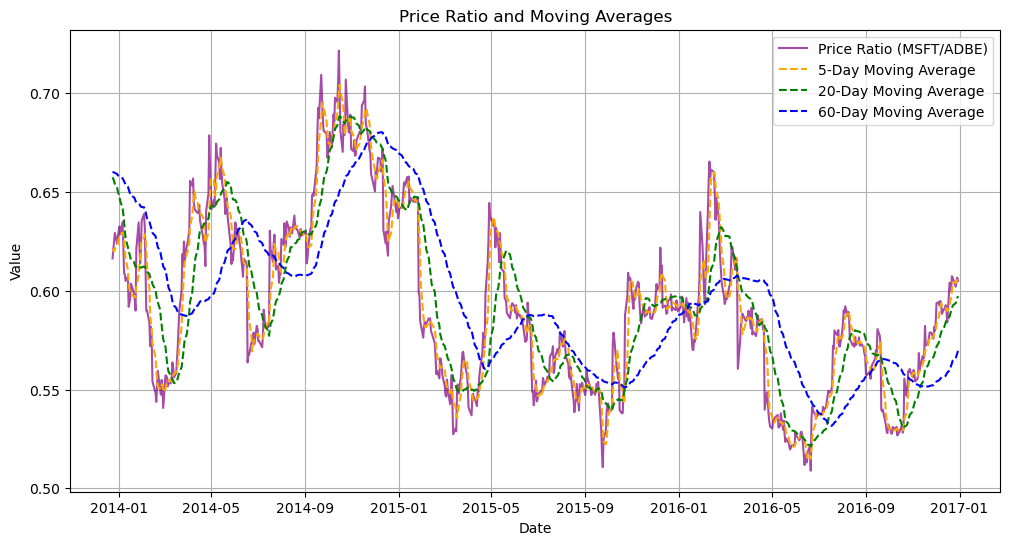

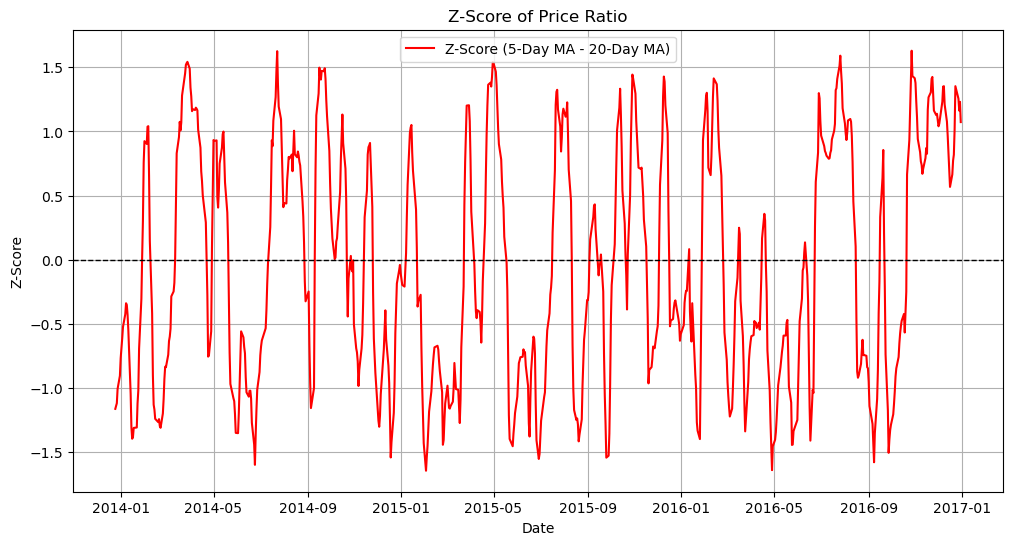

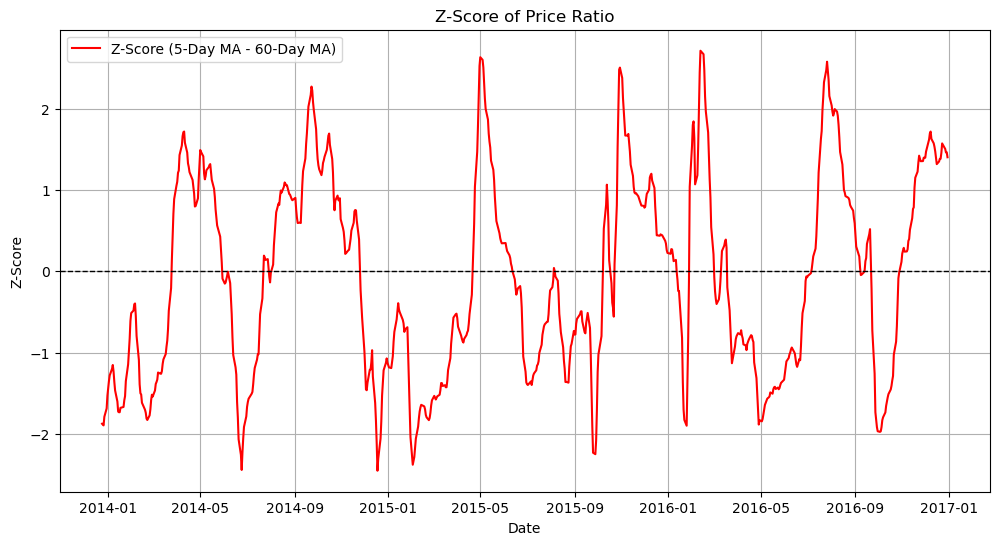

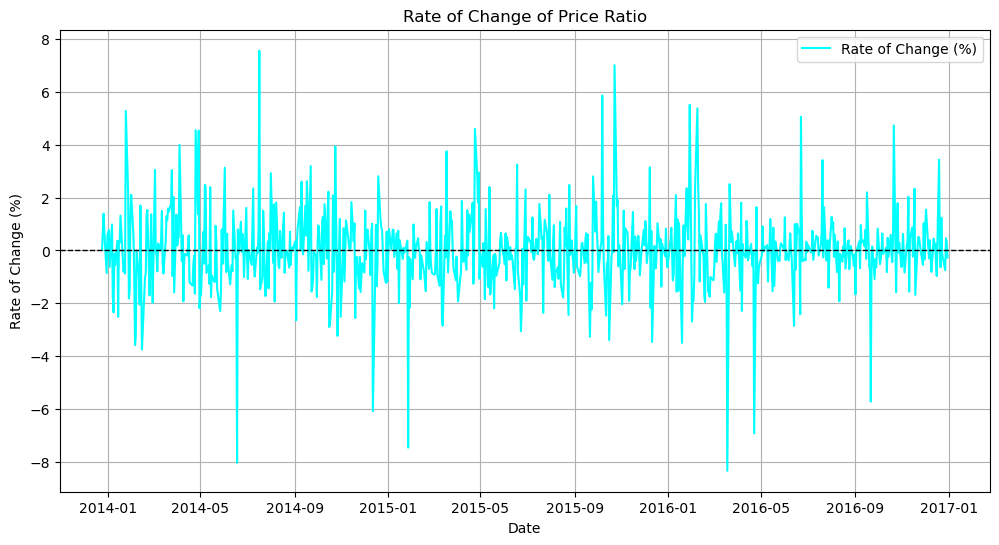

In [227]:
# Calculate moving averages (5-day, 20-day, and 60-day)
data['MAVG5'] = data['Ratio'].rolling(window=5).mean()
data['MAVG20'] = data['Ratio'].rolling(window=20).mean()
data['MAVG60'] = data['Ratio'].rolling(window=60).mean()

# Calculate the 20-day rolling standard deviation of the ratio
data['STD20'] = data['Ratio'].rolling(window=20).std()
data['STD60'] = data['Ratio'].rolling(window=60).std()

# Calculate the z-score (20-day MA and 5-day MA)
data['ZScore20_5'] = (data['MAVG5'] - data['MAVG20']) / data['STD20']
data['ZScore60_5'] = (data['MAVG5'] - data['MAVG60']) / data['STD60']

# Calculate the rate of change (percentage change over 1 day)
data['RateOfChange'] = data['Ratio'].pct_change() * 100

# Drop rows with NaN values (caused by insufficient data for rolling calculations)
data = data.dropna()

# Display the last few rows of the DataFrame
print(data.tail())

# Plot the ratio and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Ratio'], label='Price Ratio (MSFT/ADBE)', color='purple', alpha=0.7)
plt.plot(data['MAVG5'], label='5-Day Moving Average', color='orange', linestyle='--')
plt.plot(data['MAVG20'], label='20-Day Moving Average', color='green', linestyle='--')
plt.plot(data['MAVG60'], label='60-Day Moving Average', color='blue', linestyle='--')
plt.title("Price Ratio and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot the z-score
plt.figure(figsize=(12, 6))
plt.plot(data['ZScore20_5'], label='Z-Score (5-Day MA - 20-Day MA)', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at z-score = 0
plt.title("Z-Score of Price Ratio")
plt.xlabel("Date")
plt.ylabel("Z-Score")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data['ZScore60_5'], label='Z-Score (5-Day MA - 60-Day MA)', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at z-score = 0
plt.title("Z-Score of Price Ratio")
plt.xlabel("Date")
plt.ylabel("Z-Score")
plt.legend()
plt.grid(True)
plt.show()

# Plot the rate of change
plt.figure(figsize=(12, 6))
plt.plot(data['RateOfChange'], label='Rate of Change (%)', color='cyan')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at ROC = 0
plt.title("Rate of Change of Price Ratio")
plt.xlabel("Date")
plt.ylabel("Rate of Change (%)")
plt.legend()
plt.grid(True)
plt.show()

In [228]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data['MAVG5'] = data['Ratio'].rolling(window=5).mean()
data['MAVG20'] = data['Ratio'].rolling(window=20).mean()
data['MAVG60'] = data['Ratio'].rolling(window=60).mean()
data['STD20'] = data['Ratio'].rolling(window=20).std()
data['ZScore20_5'] = (data['MAVG5'] - data['MAVG20']) / data['STD20']
data['RateOfChange'] = data['Ratio'].pct_change() * 100

# Define the target variable (future price ratio)
data['FutureRatio'] = data['Ratio'].shift(-1)  # Future price ratio

# Drop rows with NaN values
data = data.dropna()

# Define features and target
features = ['MAVG5', 'MAVG20', 'MAVG60', 'STD20', 'ZScore20_5', 'RateOfChange']
X = data[features]
y = data['FutureRatio']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
actual_trend = np.sign(y_test.diff().fillna(0))  # +1 for increase, -1 for decrease, 0 for no change
predicted_trend = np.sign(np.diff([y_test.iloc[0]] + list(y_pred)))  # Align lengths
trend_accuracy = np.mean(actual_trend == predicted_trend) * 100

print(f"Trend Detection Accuracy: {trend_accuracy:.2f}%")

Mean Squared Error: 0.0001
R-squared: 0.9314
Trend Detection Accuracy: 87.23%


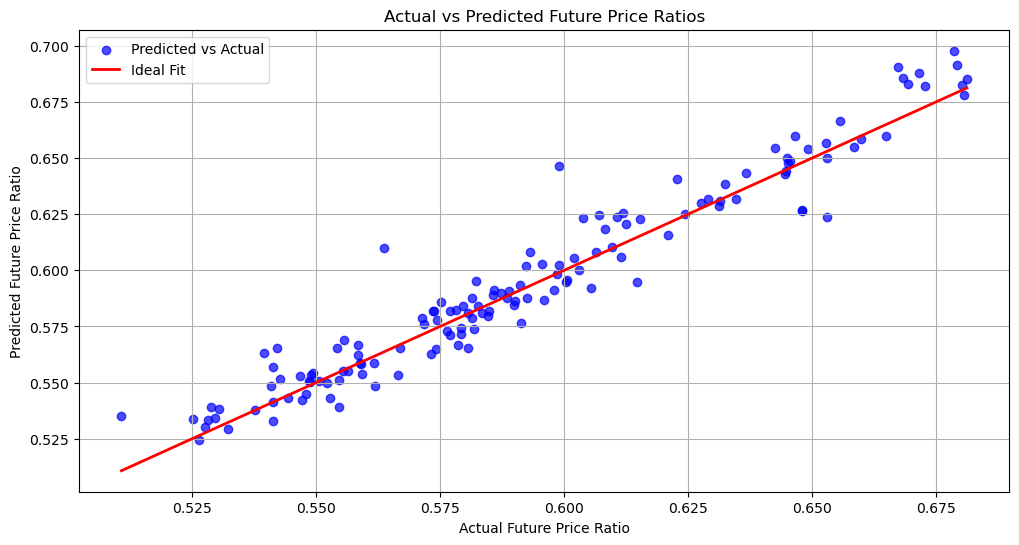

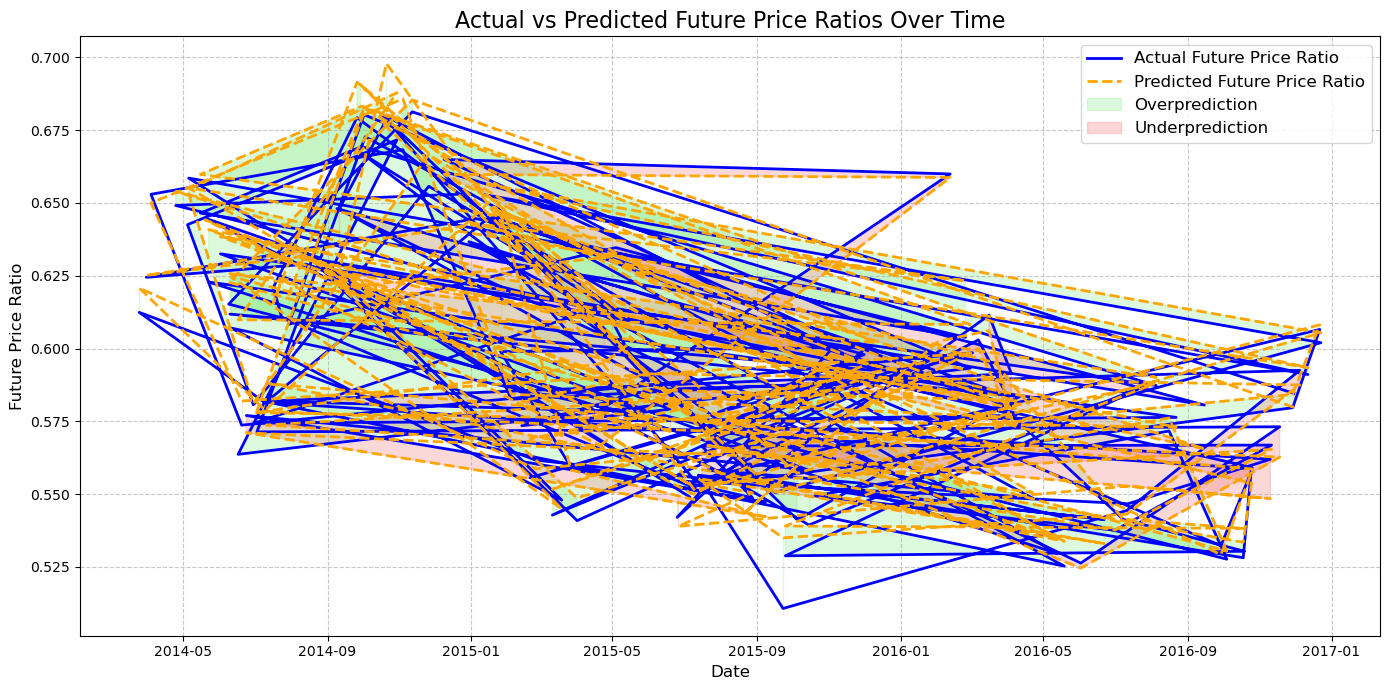

In [229]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Fit')
plt.title("Actual vs Predicted Future Price Ratios")
plt.xlabel("Actual Future Price Ratio")
plt.ylabel("Predicted Future Price Ratio")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Future Price Ratio', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted Future Price Ratio', color='orange', linestyle='--', linewidth=2)
plt.fill_between(y_test.index, y_test, y_pred, where=(y_pred > y_test), color='lightgreen', alpha=0.3, label='Overprediction')
plt.fill_between(y_test.index, y_test, y_pred, where=(y_pred < y_test), color='lightcoral', alpha=0.3, label='Underprediction')

plt.title("Actual vs Predicted Future Price Ratios Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Future Price Ratio", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

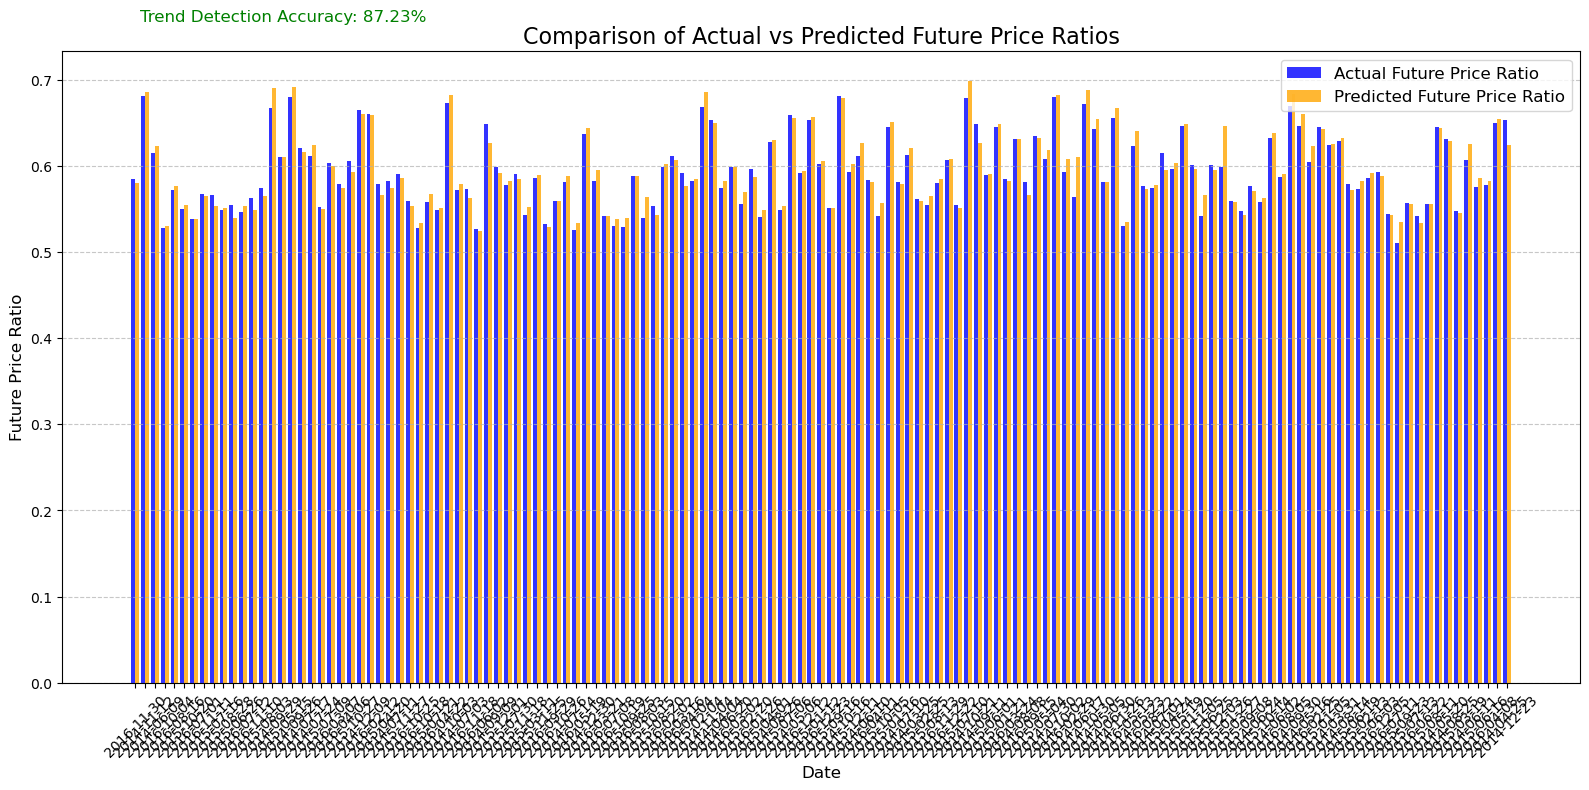

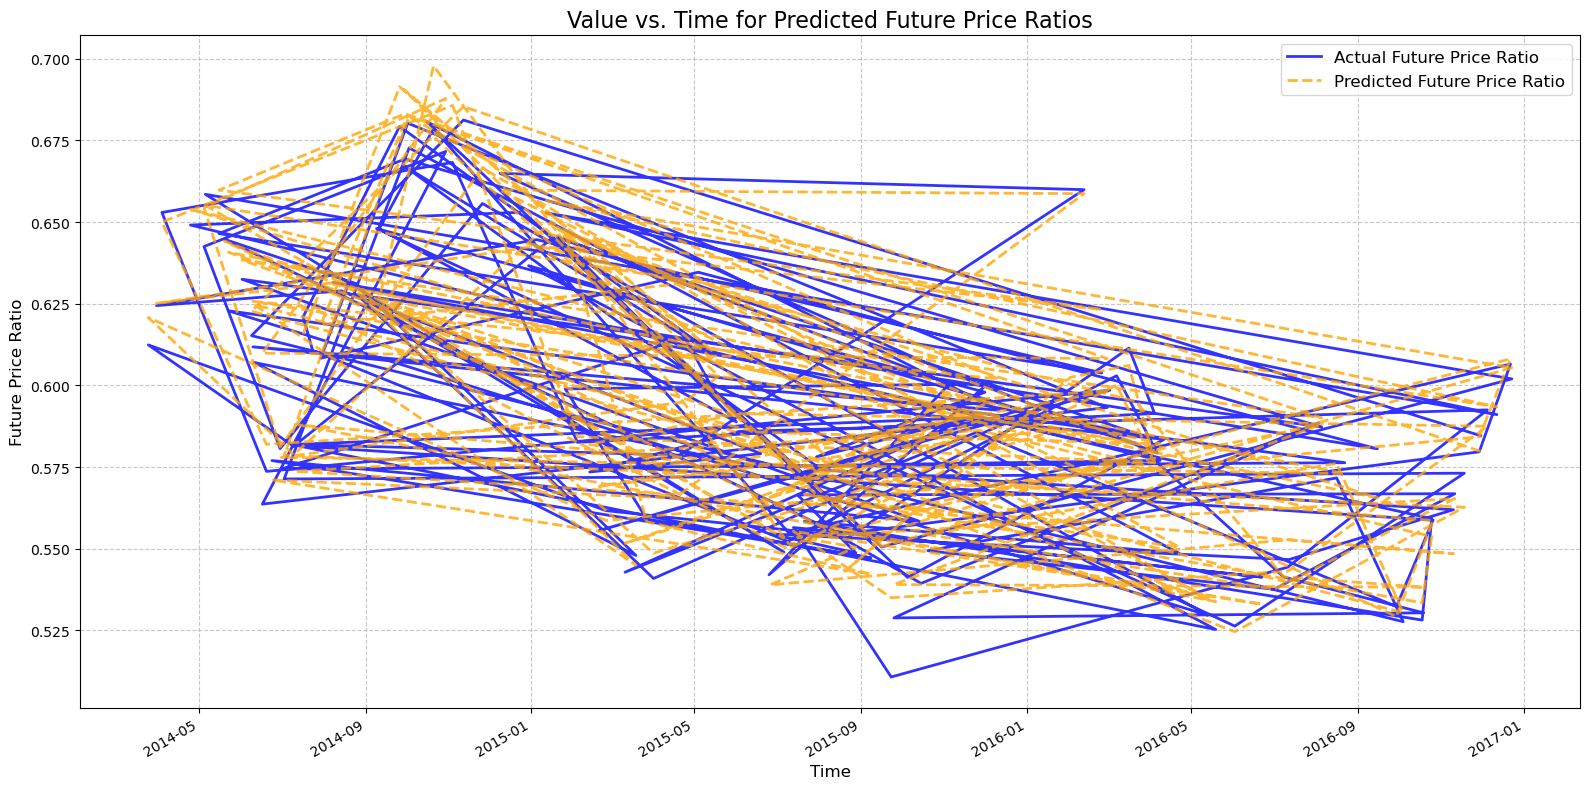

In [230]:
import matplotlib.dates as mdates

# Convert the index to a more readable format for bar charts
dates = y_test.index.strftime('%Y-%m-%d')

# Set up the bar chart
plt.figure(figsize=(16, 8))
width = 0.4  # Width of the bars

# Actual values
plt.bar(
    [i - width / 2 for i in range(len(dates))],
    y_test,
    width=width,
    label='Actual Future Price Ratio',
    color='blue',
    alpha=0.8,
)

# Predicted values
plt.bar(
    [i + width / 2 for i in range(len(dates))],
    y_pred,
    width=width,
    label='Predicted Future Price Ratio',
    color='orange',
    alpha=0.8,
)

# Customize the chart
plt.xticks(range(len(dates)), dates, rotation=45, fontsize=10)
plt.title('Comparison of Actual vs Predicted Future Price Ratios', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Future Price Ratio', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add trend accuracy as text
trend_accuracy_text = f"Trend Detection Accuracy: {trend_accuracy:.2f}%"
plt.text(0.5, max(y_test.max(), max(y_pred)) * 1.1, trend_accuracy_text, fontsize=12, color='green')

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Ensure dates are aligned with predictions
dates = y_test.index  # Assuming y_test is a Pandas Series with a DateTime index

# Create the graph
plt.figure(figsize=(16, 8))
plt.plot(dates, y_test, label='Actual Future Price Ratio', color='blue', linewidth=2, alpha=0.8)
plt.plot(dates, y_pred, label='Predicted Future Price Ratio', color='orange', linewidth=2, linestyle='--', alpha=0.8)

# Customize the graph
plt.title('Value vs. Time for Predicted Future Price Ratios', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Future Price Ratio', fontsize=12)
plt.legend(fontsize=12)
plt.grid(linestyle='--', alpha=0.7)

# Format the x-axis for dates
plt.gcf().autofmt_xdate()  # Automatically formats date labels
plt.tight_layout()

# Display the graph
plt.show()


In [231]:
def trade(S1, S2, window1, window2):
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0

    # Compute the rolling price ratio
    ratios = S1 / S2

    # Compute the 60-day (window2) and 5-day (window1) moving averages of the price ratio
    ma1 = ratios.rolling(window=window1, center=False).mean()  # 5-day moving average
    ma2 = ratios.rolling(window=window2, center=False).mean()  # 60-day moving average
    std = ratios.rolling(window=window2, center=False).std()  # 60-day rolling std

    # Calculate the Z-score
    zscore = (ma1 - ma2) / std

    # Initialize variables for simulation
    money = 0  # To track the accumulated profit/loss
    countS1 = 0  # Number of shares held for stock S1
    countS2 = 0  # Number of shares held for stock S2

    # Iterate through each day in the data
    for i in range(len(ratios)):
        # If Z-score < -1, buy signal (long position in S1, short position in S2)
        if zscore[i] < -1:
            # Execute buy trade (long on S1, short on S2)
            money -= S1[i]  # Spend money to buy S1
            countS1 += 1  # Increase position in S1
            money += S2[i] * ratios[i]  # Short S2 (you earn money from it)
            countS2 -= ratios[i]  # Increase short position in S2

        # If Z-score > 1, sell signal (short S1, long S2)
        elif zscore[i] > 1:
            # Execute sell trade (short on S1, long on S2)
            money += S1[i]  # Sell S1
            countS1 -= 1  # Reduce position in S1
            money -= S2[i] * ratios[i]  # Buy back S2
            countS2 += ratios[i]  # Increase position in S2

        # If absolute Z-score < 0.75, exit the positions (close both long and short)
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1  # Sell all S1 positions
            money -= S2[i] * countS2  # Buy back all S2 positions
            countS1 = 0  # Reset S1 positions
            countS2 = 0  # Reset S2 positions

    # Return the final amount of money after trading
    return money


In [232]:
trade(data['MSFT'],data['ADBE'],5,60)

C:\Users\shubh\AppData\Local\Temp\ipykernel_35340\1681445642.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if zscore[i] < -1:
C:\Users\shubh\AppData\Local\Temp\ipykernel_35340\1681445642.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif zscore[i] > 1:
C:\Users\shubh\AppData\Local\Temp\ipykernel_35340\1681445642.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif abs(zscore[i]) < 0.75:
C:\Users\shubh\AppData\Loca

4756.069857186951

In [233]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

data['MAVG5'] = data['Ratio'].rolling(window=5).mean()
data['MAVG20'] = data['Ratio'].rolling(window=20).mean()
data['MAVG60'] = data['Ratio'].rolling(window=60).mean()
data['STD20'] = data['Ratio'].rolling(window=20).std()
data['ZScore20_5'] = (data['MAVG5'] - data['MAVG20']) / data['STD20']
data['RateOfChange'] = data['Ratio'].pct_change() * 100

# Define the target variable (future price ratio)
data['FutureRatio'] = data['Ratio'].shift(-1)  # Future price ratio

# Drop rows with NaN values
data = data.dropna()

# Define features and target
features = ['MAVG5', 'MAVG20', 'MAVG60', 'STD20', 'ZScore20_5', 'RateOfChange']
X = data[features]
y = data['FutureRatio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models with different kernels
svm_rbf = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_linear = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Train and evaluate the SVM models
for model, kernel in zip([svm_rbf, svm_linear], ["RBF Kernel", "Linear Kernel"]):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{kernel}:\nMean Squared Error: {mse:.4f}\nR-squared: {r2:.4f}")
    
    # Trend prediction accuracy
    actual_trend = np.sign(y_test.diff().fillna(0))  # +1 for increase, -1 for decrease, 0 for no change
    predicted_trend = np.sign(np.diff([y_test.iloc[0]] + list(y_pred)))  # Align lengths
    trend_accuracy = np.mean(actual_trend == predicted_trend) * 100
    print(f"Trend Detection Accuracy: {trend_accuracy:.2f}%\n")


RBF Kernel:
Mean Squared Error: 0.0026
R-squared: -0.1301
Trend Detection Accuracy: 86.82%

Linear Kernel:
Mean Squared Error: 0.0025
R-squared: -0.0961
Trend Detection Accuracy: 93.02%



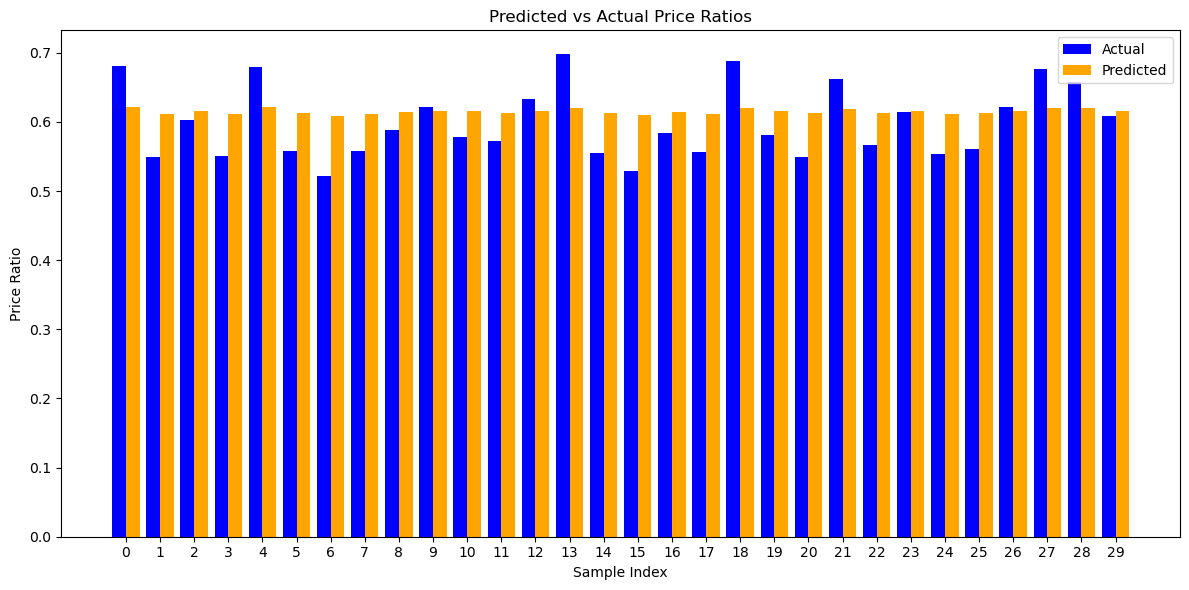

In [234]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test and y_pred from the SVM model
# Convert y_test and y_pred to numpy arrays for plotting
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Select a subset of data for better visualization (if needed)
n_samples = 30  # Adjust this for more/less data in the graph
y_test_subset = y_test_array[:n_samples]
y_pred_subset = y_pred_array[:n_samples]

# Create the bar graph
x_indices = np.arange(len(y_test_subset))  # Indices for the x-axis

plt.figure(figsize=(12, 6))
bar_width = 0.4

# Plot actual price ratios
plt.bar(x_indices - bar_width/2, y_test_subset, width=bar_width, label='Actual', color='blue')

# Plot predicted price ratios
plt.bar(x_indices + bar_width/2, y_pred_subset, width=bar_width, label='Predicted', color='orange')

# Add labels, legend, and title
plt.xlabel('Sample Index')
plt.ylabel('Price Ratio')
plt.title('Predicted vs Actual Price Ratios')
plt.legend()
plt.xticks(ticks=x_indices, labels=x_indices)

# Display the graph
plt.tight_layout()
plt.show()


In [235]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Feature engineering
data['MAVG5'] = data['Ratio'].rolling(window=5).mean()
data['MAVG20'] = data['Ratio'].rolling(window=20).mean()
data['MAVG60'] = data['Ratio'].rolling(window=60).mean()
data['STD20'] = data['Ratio'].rolling(window=20).std()
data['ZScore20_5'] = (data['MAVG5'] - data['MAVG20']) / data['STD20']
data['RateOfChange'] = data['Ratio'].pct_change() * 100

# Define the target variable (future price ratio)
data['FutureRatio'] = data['Ratio'].shift(-1)  # Future price ratio

# Drop rows with NaN values
data = data.dropna()

# Define features and target
features = ['MAVG5', 'MAVG20', 'MAVG60', 'STD20', 'ZScore20_5', 'RateOfChange']
X = data[features]
y = data['FutureRatio']

# Train-test split: First 80% for training, last 20% for testing
train_size = int(len(data) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Trend prediction accuracy
actual_trend = np.sign(y_test.diff().fillna(0))  # +1 for increase, -1 for decrease, 0 for no change
predicted_trend = np.sign(np.diff([y_test.iloc[0]] + list(y_pred)))  # Align lengths
trend_accuracy = np.mean(actual_trend == predicted_trend) * 100
print(f"Trend Detection Accuracy: {trend_accuracy:.2f}%")


Mean Squared Error: 0.0001
R-squared: 0.7684
Trend Detection Accuracy: 56.41%


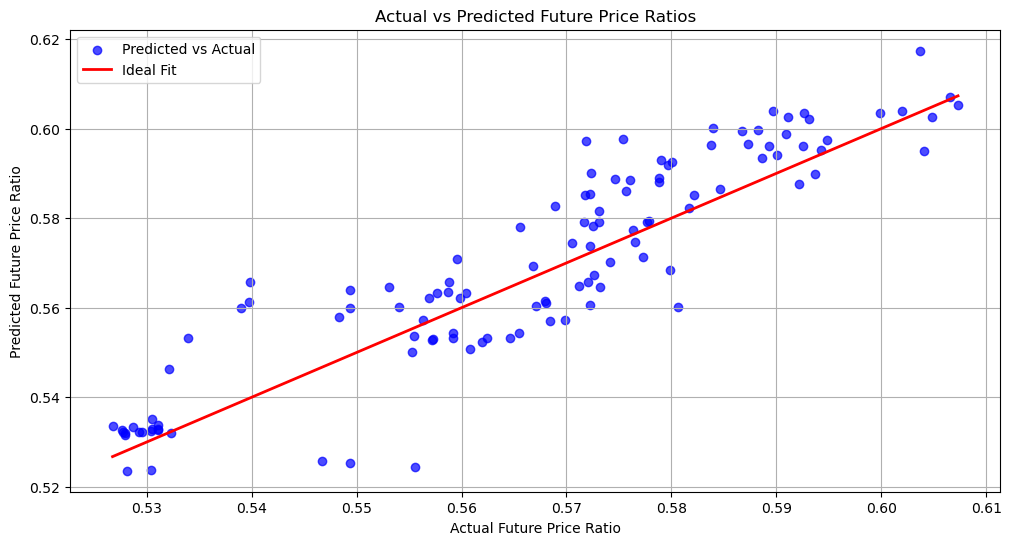

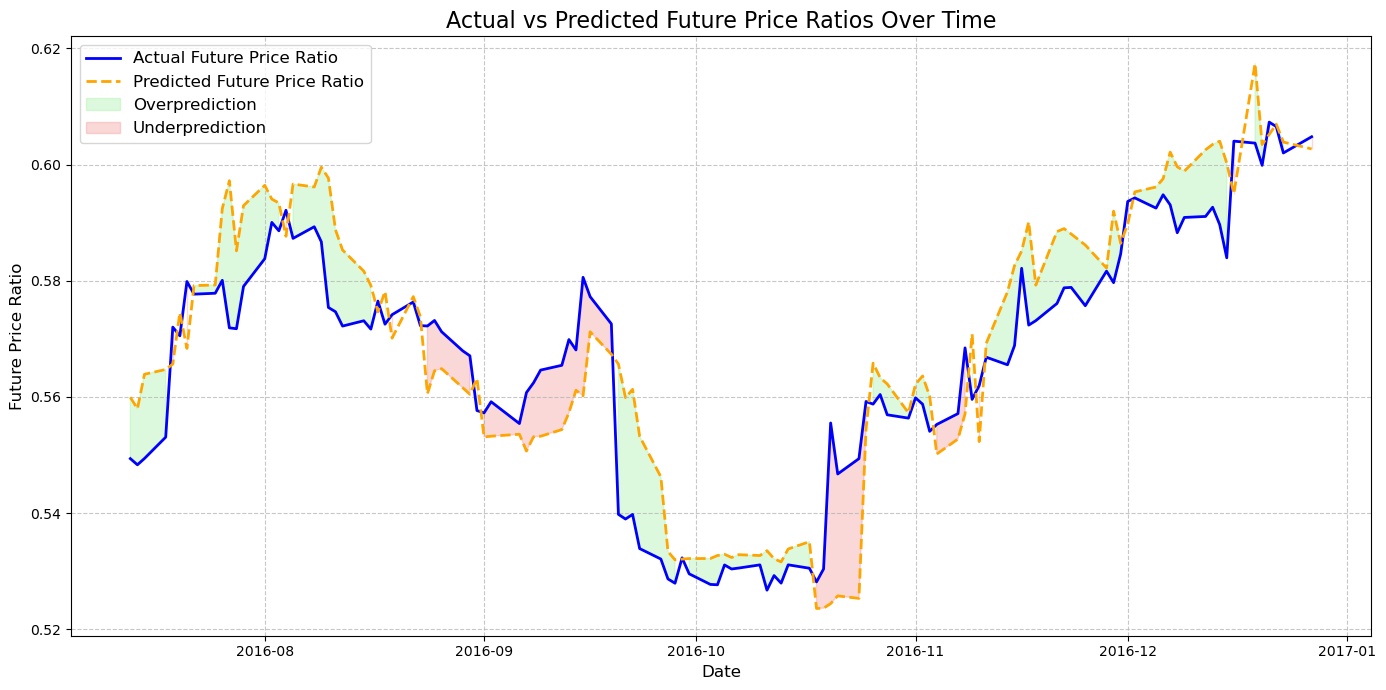

In [236]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Fit')
plt.title("Actual vs Predicted Future Price Ratios")
plt.xlabel("Actual Future Price Ratio")
plt.ylabel("Predicted Future Price Ratio")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Future Price Ratio', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted Future Price Ratio', color='orange', linestyle='--', linewidth=2)
plt.fill_between(y_test.index, y_test, y_pred, where=(y_pred > y_test), color='lightgreen', alpha=0.3, label='Overprediction')
plt.fill_between(y_test.index, y_test, y_pred, where=(y_pred < y_test), color='lightcoral', alpha=0.3, label='Underprediction')

plt.title("Actual vs Predicted Future Price Ratios Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Future Price Ratio", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [237]:
def trade(predicted_ratios, window1=5, window2=60):
    """
    Simulates trading based on Z-score thresholds using predicted price ratios.

    Args:
        predicted_ratios (array-like): Predicted price ratios.
        window1 (int): Short-term moving average window (e.g., 5-day).
        window2 (int): Long-term moving average window (e.g., 60-day).

    Returns:
        float: Final money balance after trading.
    """
    # If window length is 0, the algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0

    # Compute rolling mean and rolling standard deviation
    ma1 = predicted_ratios.rolling(window=window1, center=False).mean()
    ma2 = predicted_ratios.rolling(window=window2, center=False).mean()
    std = predicted_ratios.rolling(window=window2, center=False).std()
    zscore = (ma1 - ma2) / std

    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0

    for i in range(len(predicted_ratios)):
        # Buy long if the Z-score is > 1
        if zscore[i] > 1:
            money -= predicted_ratios[i]  # Invest in the asset
            countS1 += 1
        # Sell short if the Z-score is < -1
        elif zscore[i] < -1:
            money += predicted_ratios[i]  # Gain from selling short
            countS1 -= 1
        # Clear positions if the Z-score is between -0.5 and 0.5
        elif abs(zscore[i]) < 0.75:
            money += countS1 * predicted_ratios[i]  # Settle the trades
            countS1 = 0

    return money

# Apply the trading strategy using predicted ratios
predicted_ratios_series = pd.Series(y_pred, index=X_test.index)
final_money = trade(predicted_ratios_series)

print(f"Final Money Balance: {final_money:.2f}")


Final Money Balance: -17.75


C:\Users\shubh\AppData\Local\Temp\ipykernel_35340\4015024998.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if zscore[i] > 1:
C:\Users\shubh\AppData\Local\Temp\ipykernel_35340\4015024998.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif zscore[i] < -1:
C:\Users\shubh\AppData\Local\Temp\ipykernel_35340\4015024998.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif abs(zscore[i]) < 0.75:
C:\Users\shubh\AppData\Loca

In [238]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Feature engineering
data['MAVG5'] = data['Ratio'].rolling(window=5).mean()
data['MAVG20'] = data['Ratio'].rolling(window=20).mean()
data['MAVG60'] = data['Ratio'].rolling(window=60).mean()
data['STD20'] = data['Ratio'].rolling(window=20).std()
data['ZScore20_5'] = (data['MAVG5'] - data['MAVG20']) / data['STD20']
data['RateOfChange'] = data['Ratio'].pct_change() * 100

# Define the target variable (future price ratio)
data['FutureRatio'] = data['Ratio'].shift(-1)  # Future price ratio

# Drop rows with NaN values
data = data.dropna()

# Define features and target
features = ['MAVG5', 'MAVG20', 'MAVG60', 'STD20', 'ZScore20_5', 'RateOfChange']
X = data[features]
y = data['FutureRatio']

# Train-test split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Store models and their metrics
models = {
    'SVM_Linear': SVR(kernel='linear'),
    'SVM_RBF': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Polynomial_Regression': None  # Will be defined later
}

results = {}

# Train and evaluate models
for model_name, model in models.items():
    if model_name == 'Polynomial_Regression':
        # Polynomial regression setup
        poly = PolynomialFeatures(degree=3)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)
        poly_model = LinearRegression()
        poly_model.fit(X_poly_train, y_train)
        y_pred = poly_model.predict(X_poly_test)
        models[model_name] = poly_model  # Save the trained model
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    actual_trend = np.sign(y_test.diff().fillna(0))
    predicted_trend = np.sign(np.diff([y_test.iloc[0]] + list(y_pred)))
    trend_accuracy = np.mean(actual_trend == predicted_trend) * 100

    # Store results
    results[model_name] = {
        'MSE': mse,
        'R2': r2,
        'Trend_Accuracy': trend_accuracy,
        'Predictions': y_pred
    }

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"R-squared: {metrics['R2']:.4f}")
    print(f"Trend Detection Accuracy: {metrics['Trend_Accuracy']:.2f}%")



SVM_Linear:
Mean Squared Error: 0.0014
R-squared: -0.0707
Trend Detection Accuracy: 0.00%

SVM_RBF:
Mean Squared Error: 0.0014
R-squared: -0.0707
Trend Detection Accuracy: 0.00%

KNN:
Mean Squared Error: 0.0011
R-squared: 0.1443
Trend Detection Accuracy: 66.67%

Polynomial_Regression:
Mean Squared Error: 0.0002
R-squared: 0.8805
Trend Detection Accuracy: 90.48%


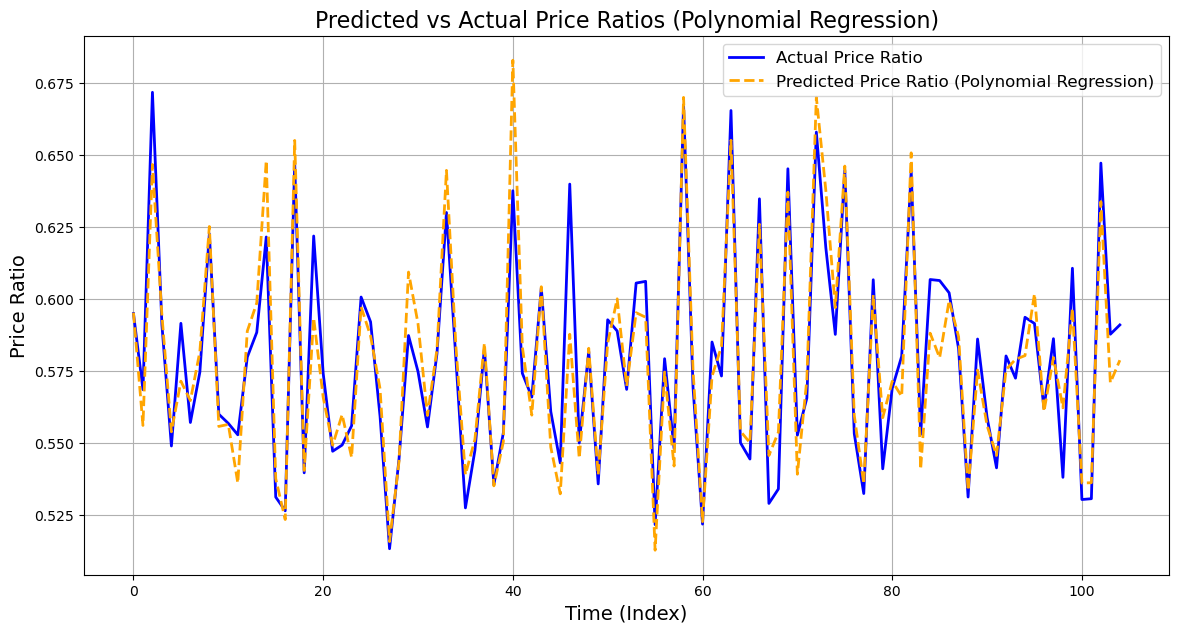

In [239]:
# clearly polynomial regression works incredibly well
#plotting the respectiev graphs:

import matplotlib.pyplot as plt

# Polynomial regression setup
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# Plot the predicted vs actual price ratios
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test.values, label='Actual Price Ratio', color='blue', linewidth=2)
plt.plot(range(len(y_pred_poly)), y_pred_poly, label='Predicted Price Ratio (Polynomial Regression)', color='orange', linestyle='--', linewidth=2)

# Adding title and labels
plt.title('Predicted vs Actual Price Ratios (Polynomial Regression)', fontsize=16)
plt.xlabel('Time (Index)', fontsize=14)
plt.ylabel('Price Ratio', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [267]:
def trade(predicted_ratios, window1=5, window2=60):
    """
    Simulates trading based on Z-score thresholds using predicted price ratios.

    Args:
        predicted_ratios (array-like): Predicted price ratios.
        window1 (int): Short-term moving average window (e.g., 5-day).
        window2 (int): Long-term moving average window (e.g., 60-day).

    Returns:
        float: Final money balance after trading.
    """
    # Check if windows are valid
    if (window1 <= 0) or (window2 <= 0) or (window1 >= window2):
        raise ValueError("Invalid window lengths for moving averages.")

    # Compute rolling mean, standard deviation, and Z-score
    ma1 = predicted_ratios.rolling(window=window1, center=False).mean()
    ma2 = predicted_ratios.rolling(window=window2, center=False).mean()
    std = predicted_ratios.rolling(window=window2, center=False).std()
    zscore = (ma1 - ma2) / std

    # Drop NaN values from Z-score due to rolling calculations
    valid_indices = zscore.dropna().index
    zscore = zscore.loc[valid_indices]
    predicted_ratios = predicted_ratios.loc[valid_indices]

    # Simulate trading
    money = 0
    countS1 = 0

    for i in range(len(predicted_ratios)):
        # Buy long if Z-score > 1
        if zscore.iloc[i] > 1:
            money -= predicted_ratios.iloc[i]
            countS1 += 1
        # Sell short if Z-score < -1
        elif zscore.iloc[i] < -1:
            money += predicted_ratios.iloc[i]
            countS1 -= 1
        # Clear positions if Z-score between -0.75 and 0.75
        elif abs(zscore.iloc[i]) < 0.75:
            money += countS1 * predicted_ratios.iloc[i]
            countS1 = 0

    # Settle any remaining positions at the end
    money += countS1 * predicted_ratios.iloc[-1]

    return money


# Convert predicted values to pandas Series
predicted_ratios_series = pd.Series(y_pred_poly, index=X_test.index)

# Apply the trading strategy
final_money = trade(predicted_ratios_series)

print(f"Final Money Balance: {final_money:.2f}")


Final Money Balance: -0.13
